In [1]:

%matplotlib inline


# Date tick labels


Show how to make date plots in matplotlib using date tick locators and
formatters.  See major_minor_demo1.py for more information on
controlling major and minor ticks

All matplotlib date plotting is done by converting date instances into days
since 0001-01-01 00:00:00 UTC plus one day (for historical reasons).  The
conversion, tick locating and formatting is done behind the scenes so this
is most transparent to you.  The dates module provides several converter
functions `matplotlib.dates.date2num` and `matplotlib.dates.num2date`.
These can convert between `datetime.datetime` objects and
:class:`numpy.datetime64` objects.



In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [3]:

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

In [4]:

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

In [9]:

# round to nearest years...
datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')

In [11]:

def price(x):
    return '$%1.2f' % x

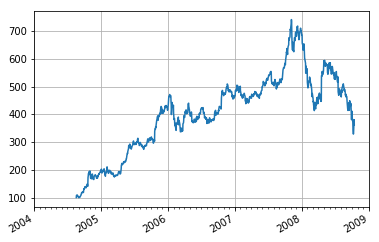

In [13]:

fig, ax = plt.subplots()
line2d = ax.plot(r.date, r.adj_close)
ax.set_xlim(datemin, datemax)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()